In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

In [2]:
d = pd.read_csv('findings_data.csv')

In [3]:
d.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


In [6]:
## Here I'm just going to split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 

all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        d[c_label] = d['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
d.sample(20)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
853,854,854,Effusion,39,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
830,831,831,Cardiomegaly,48,F,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
873,874,874,No Finding,55,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47,48,48,Infiltration,50,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63,64,64,No Finding,63,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
975,976,976,Cardiomegaly,55,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
946,947,947,No Finding,55,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
785,786,786,No Finding,53,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159,160,160,Infiltration,22,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
706,707,707,Mass,56,M,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(all_labels)

14

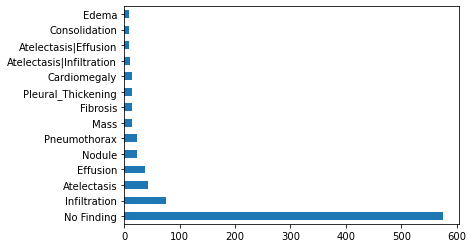

In [32]:
d['Finding Labels'].value_counts()[ :14].plot(kind='barh')

In [34]:

a

No Finding                                  575
Infiltration                                 75
Atelectasis                                  44
Effusion                                     38
Nodule                                       24
                                           ... 
Infiltration|Pneumothorax                     1
Atelectasis|Mass                              1
Atelectasis|Nodule                            1
Effusion|Pleural_Thickening|Pneumothorax      1
Atelectasis|Fibrosis|Infiltration             1
Name: Finding Labels, Length: 85, dtype: int64

I see here that there are 14 unique types of labels found in my dataset

In [11]:
d[all_labels].sum()/len(d)

Atelectasis           0.093093
Cardiomegaly          0.038038
Consolidation         0.043043
Edema                 0.016016
Effusion              0.095095
Emphysema             0.018018
Fibrosis              0.027027
Infiltration          0.134134
Mass                  0.035035
No Finding            0.575576
Nodule                0.041041
Pleural_Thickening    0.032032
Pneumonia             0.006006
Pneumothorax          0.033033
dtype: float64

In [25]:
d[all_labels].sum()

Atelectasis            93.0
Cardiomegaly           38.0
Consolidation          43.0
Edema                  16.0
Effusion               95.0
Emphysema              18.0
Fibrosis               27.0
Infiltration          134.0
Mass                   35.0
No Finding            575.0
Nodule                 41.0
Pleural_Thickening     32.0
Pneumonia               6.0
Pneumothorax           33.0
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

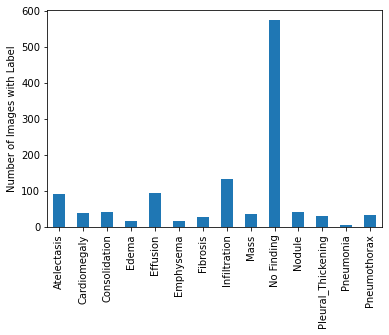

In [17]:
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

Above, I see the relative frequencies of each disease in my dataset. It looks like 'No Finding' is the most common occurrence. 'No Finding' can never appear with any other label by definition, so we know that in 57.5% of this dataset, there is no finding in the image. Beyond that, it appears that 'Infiltration' is the most common disease-related label, and it is followed by 'Effusion' and 'Atelectasis.'

Since 'Infiltration' is the most common, I'm going to now look at how frequently it appears with all of the other diseases: 

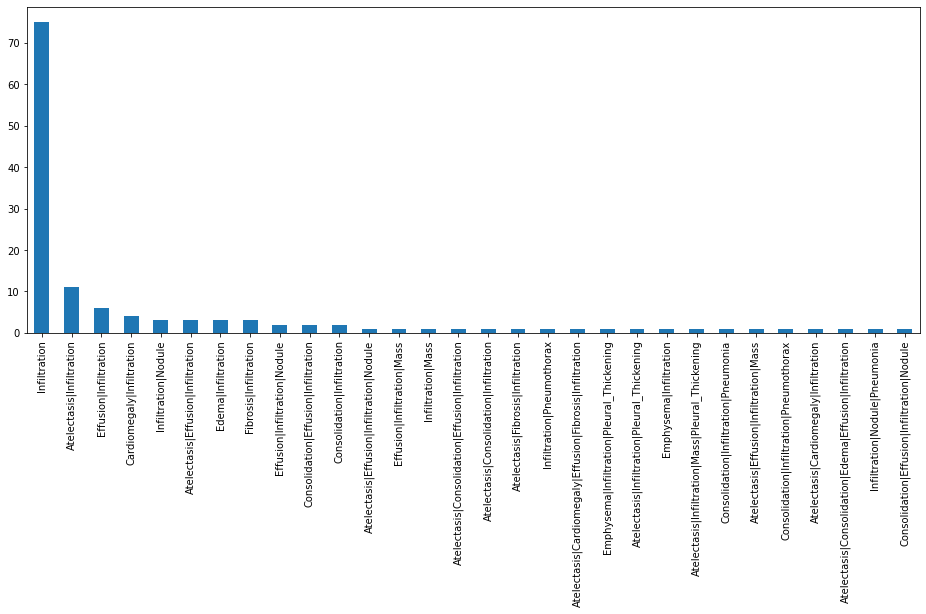

In [35]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
d[d.Infiltration==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

It looks like Infiltration actually occurs alone for the most part, and that its most-common comorbidities are Atelectasis and Effusion. 

Let's see if the same is true for another label, we'll try Effusion:

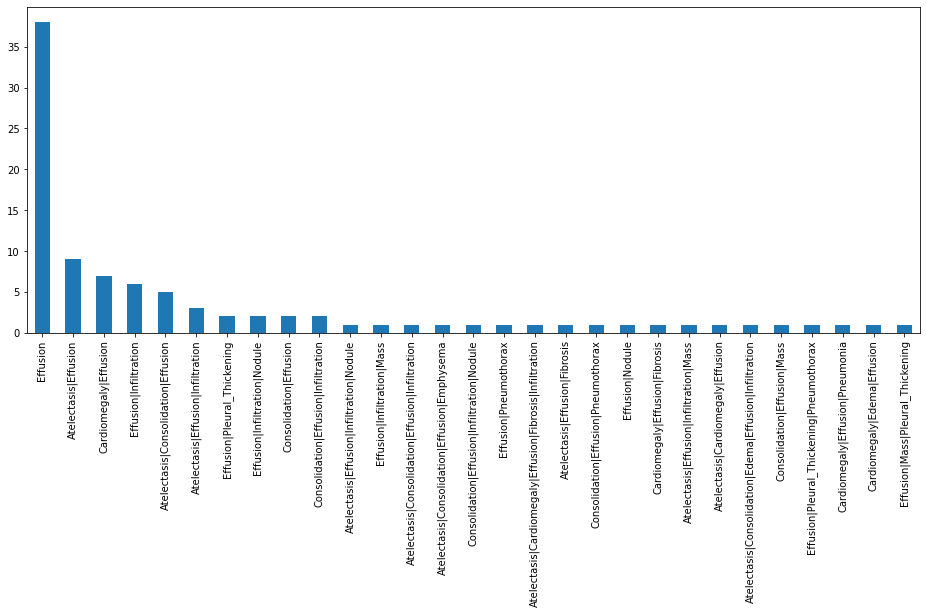

In [38]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
d[d.Effusion==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

Same thing! Now let's move on to looking at age & gender: 

(array([ 29.,  51.,  60.,  96., 154., 194., 229., 109.,  58.,  19.]),
 array([ 6. , 14.1, 22.2, 30.3, 38.4, 46.5, 54.6, 62.7, 70.8, 78.9, 87. ]),
 <a list of 10 Patch objects>)

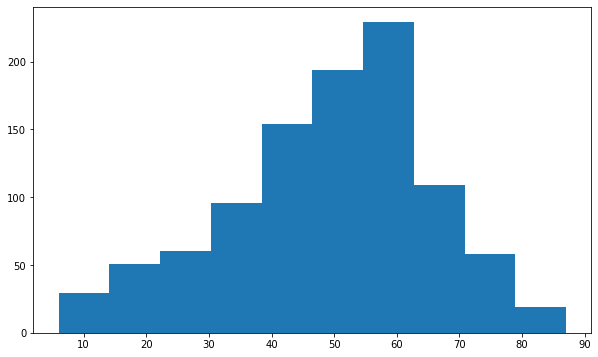

In [39]:
plt.figure(figsize=(10,6))
plt.hist(d['Patient Age'])

(array([ 8., 11., 14., 15., 18., 27., 30.,  4.,  4.,  3.]),
 array([11. , 18.6, 26.2, 33.8, 41.4, 49. , 56.6, 64.2, 71.8, 79.4, 87. ]),
 <a list of 10 Patch objects>)

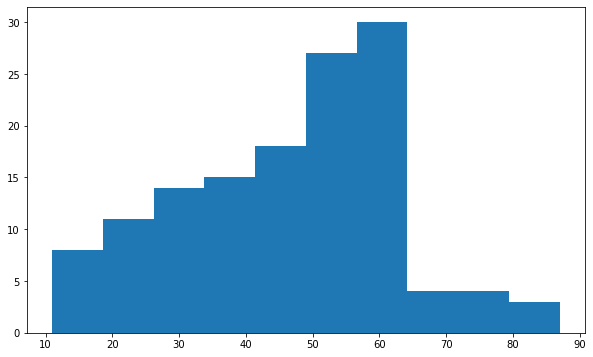

In [40]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Infiltration==1]['Patient Age'])

(array([ 2.,  1.,  6.,  7.,  9., 13., 31., 13.,  7.,  6.]),
 array([11., 18., 25., 32., 39., 46., 53., 60., 67., 74., 81.]),
 <a list of 10 Patch objects>)

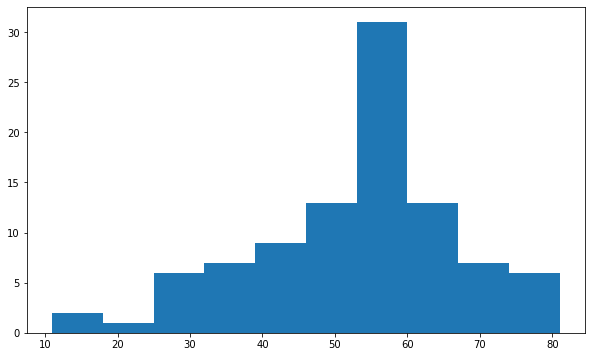

In [41]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Effusion==1]['Patient Age'])

Looks like the distribution of age across the whole population is slightly different than it is specifically for Infiltration and Effusion. Infiltration appears to be more skewed towards younger individuals, and Effusion spans the age range but has a large peak around 55. 

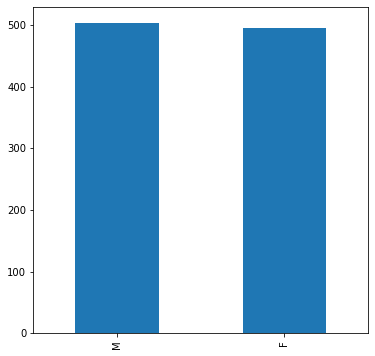

In [42]:
plt.figure(figsize=(6,6))
d['Patient Gender'].value_counts().plot(kind='bar')

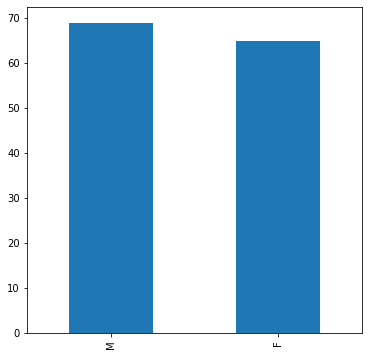

In [43]:
plt.figure(figsize=(6,6))
d[d.Infiltration ==1]['Patient Gender'].value_counts().plot(kind='bar')

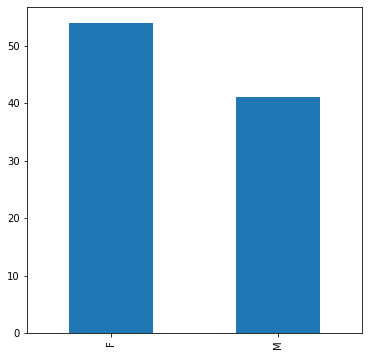

In [44]:
plt.figure(figsize=(6,6))
d[d.Effusion ==1]['Patient Gender'].value_counts().plot(kind='bar')

Gender distribution seems to be pretty equal in the whole population as well as with Infiltration, with a slight preference towards females in the Effusion distribution. 

#### Finally, let's look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

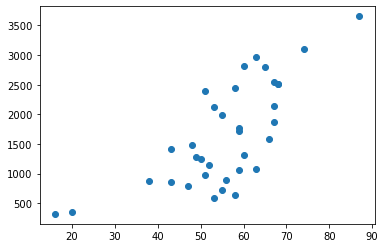

In [45]:
plt.scatter(d['Patient Age'],d['Mass_Size'])

In [46]:
mass_sizes = d['Mass_Size'].values
mass_inds = np.where(~np.isnan(mass_sizes))
ages = d.iloc[mass_inds]['Patient Age']
mass_sizes=mass_sizes[mass_inds]
scipy.stats.pearsonr(mass_sizes,ages)

(0.7275663300043572, 7.354553889321959e-07)

In [53]:
mass_inds

(array([  4,  10,  17,  44,  46,  66, 101, 107, 113, 184, 185, 214, 220,
        266, 273, 275, 282, 296, 345, 352, 390, 466, 518, 588, 675, 706,
        774, 795, 867, 871, 918, 928, 929, 942, 995]),)

In [57]:
d['Mass_Size'].values

array([  nan,   nan,   nan,   nan, 2516.,   nan,   nan,   nan,   nan,
         nan, 1071.,   nan,   nan,   nan,   nan,   nan,   nan, 2820.,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan, 2397.,
         nan, 3654.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 1488.,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 2795.,   nan,   nan,   nan,   nan,   nan,  583.,
         nan,   nan,   nan,   nan,   nan, 1062.,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

In [54]:
ages

4      68
10     63
17     60
44     51
46     87
66     48
101    65
107    53
113    59
184    59
185    59
214    67
220    67
266    60
273    55
275    55
282    20
296    16
345    50
352    52
390    58
466    58
518    51
588    63
675    66
706    56
774    47
795    74
867    68
871    49
918    67
928    43
929    43
942    53
995    38
Name: Patient Age, dtype: int64

In [55]:
mass_sizes

array([2516., 1071., 2820., 2397., 3654., 1488., 2795.,  583., 1062.,
       1770., 1711., 1876., 2144., 1320.,  715., 1980.,  360.,  320.,
       1250., 1144.,  638., 2436.,  969., 2961., 1584.,  896.,  799.,
       3108., 2516., 1274., 2546., 1419.,  860., 2120.,  874.])

In [49]:
 d.isna().sum()

Unnamed: 0              0
Patient ID              0
Finding Labels          0
Patient Age             0
Patient Gender          0
Mass_Size             964
Atelectasis             0
Cardiomegaly            0
Consolidation           0
Edema                   0
Effusion                0
Emphysema               0
Fibrosis                0
Infiltration            0
Mass                    0
No Finding              0
Nodule                  0
Pleural_Thickening      0
Pneumonia               0
Pneumothorax            0
dtype: int64

In [48]:
from scipy.stats import pearsonr
corr, _ = pearsonr(d['Patient Age'], d['Mass_Size'])
print('Pearsons correlation: %.3f' % corr)

ValueError: array must not contain infs or NaNs

The above tells us that age and mass size are significantly correlated, with a Pearson's coerrelation coefficient of 0.727

In [50]:
np.mean(d[d['Patient Gender']== 'M']['Mass_Size'])

1735.7

In [51]:
np.mean(d[d['Patient Gender']== 'F']['Mass_Size'])

1550.8

In [52]:
scipy.stats.ttest_ind(d[d['Patient Gender']== 'F']['Mass_Size'],d[d['Patient Gender']== 'M']['Mass_Size'],nan_policy='omit')

Ttest_indResult(statistic=-0.6188395721019645, pvalue=0.5402707532656862)

The above tells us that there is no statistically significant difference between mass size with gender. 